In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import os
from sklearn.metrics import accuracy_score

/Users/Rong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
os.getcwd()
diabetes = pd.read_csv('/Users/Rong/Documents/USf/Machine Learning 2/Datasets/diabetes/diabetes.csv')
print(diabetes.head())

X = diabetes.iloc[:, :-1]
Y = diabetes.iloc[:, -1]


   Pregnancies  Glucose  DiastolicBloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      148                      72             35        0  33.6   
1          1.0       85                      66             29        0  26.6   
2          8.0      183                      64              0        0  23.3   
3          1.0       89                      66             23       94  28.1   
4          0.0      137                      40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
#Plotting Pregnancies against Outcome 
    sns.regplot(diabetes.Pregnancies, diabetes.Outcome)

IndentationError: unexpected indent (<ipython-input-4-e670d32cc626>, line 2)

In [ ]:
#Plotting glucose levels against Outcome
sns.regplot(diabetes.Glucose, diabetes.Outcome, data = diabetes)

In [ ]:
#Plotting Diastolic Blood Pressure levels against Outcome
sns.regplot(diabetes.DiastolicBloodPressure, diabetes.Outcome)

In [ ]:
#Plotting SkinThickness levels against Outcome
sns.regplot(diabetes.SkinThickness, diabetes.Outcome)

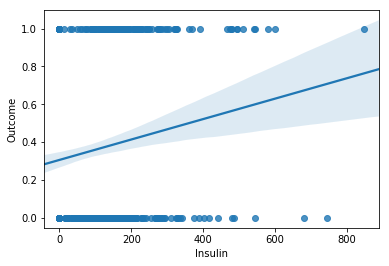

In [5]:
#Plotting Insulin levels against Outcome
sns.regplot(diabetes.Insulin, diabetes.Outcome)

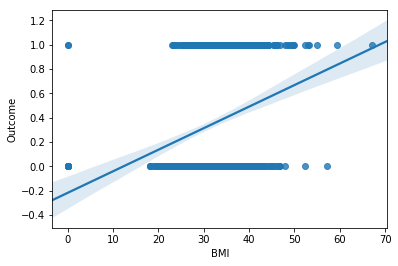

In [6]:
#Plotting BMI against Outcome
sns.regplot(diabetes.BMI, diabetes.Outcome)

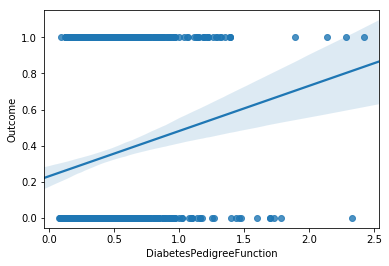

In [7]:
#Plotting DiabetesPedigreeFunction against Outcome
sns.regplot(diabetes.DiabetesPedigreeFunction, diabetes.Outcome)

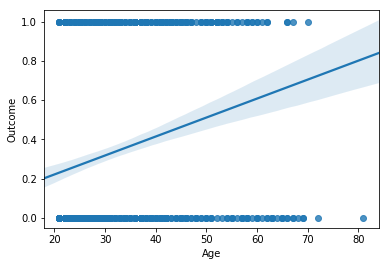

In [8]:
#Plotting Age against Outcome
sns.regplot(diabetes.Age, diabetes.Outcome)

In [9]:
from sklearn.model_selection import train_test_split
seed = 7
test_size = 0.2
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = test_size, random_state = seed)

In [15]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
train_x_imputed = imputer.fit_transform(train_x)
test_x_imputed = imputer.fit_transform(test_x)



In [52]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_features = 'auto', max_depth = 7, bootstrap = True, random_state = 1)
clf.fit(train_x_imputed, train_y)
hypotheses = clf.predict(test_x_imputed)
print('Random Forest accuracy: %0.4f' % (accuracy_score(test_y, hypotheses)))
print(clf.feature_importances_)

Random Forest accuracy: 0.8182
[ 0.06920397  0.26883393  0.07060961  0.06834125  0.07261806  0.19542234
  0.11936784  0.13560301]


In [61]:
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=10, max_depth=6, learning_rate=0.1, subsample=0.5)
clf.fit(train_x_imputed, train_y)
hypotheses = clf.predict(test_x_imputed)
print('XGB classifier accuracy: %0.4f' % (accuracy_score(test_y, hypotheses)))

XGB classifier accuracy: 0.8117
